<a href="https://colab.research.google.com/github/thiviyan98/ThiviyanNanthakumarCE888/blob/master/Assignment_2/Ass2Data3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score , StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from collections import Counter 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##1.Import and Reading Dataset

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/thiviyan98/ThiviyanNanthakumarCE888/master/Assignment1/Data/Contraceptive%20Method%20Choice%20Data%20Set/ContraceptiveMethodChoiceDataSet.csv',names=['Wife Age','Wife Education','Husband Education','Number of Children','Wife religion','Wife working','Husband Occupation','SOLI','Media Exposure','Contraceptive Method'] ,sep=',', quotechar='"')

In [3]:
df

,Wife Age,Wife Education,Husband Education,Number of Children,Wife religion,Wife working,Husband Occupation,SOLI,Media Exposure,Contraceptive Method
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1
...,...,...,...,...,...,...,...,...,...,...
1468,33,4,4,2,1,0,2,4,0,3
1469,33,4,4,3,1,1,1,4,0,3
1470,39,3,3,8,1,0,1,4,0,3
1471,33,3,3,4,1,0,2,2,0,3


In [4]:
#Check if there needs to be any preprocessing done
df.describe()
#There is no need to do preprocessing as the data has a small mean and standard deviation.

,Wife Age,Wife Education,Husband Education,Number of Children,Wife religion,Wife working,Husband Occupation,SOLI,Media Exposure,Contraceptive Method
count,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000
mean,32.538357,2.958588,3.429735,3.261371,0.850645,0.749491,2.137814,3.133741,0.073999,1.919891
std,8.227245,1.014994,0.816349,2.358549,0.356559,0.433453,0.864857,0.976161,0.261858,0.876376
min,16.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,26.000000,2.000000,3.000000,1.000000,1.000000,0.000000,1.000000,3.000000,0.000000,1.000000
50%,32.000000,3.000000,4.000000,3.000000,1.000000,1.000000,2.000000,3.000000,0.000000,2.000000
75%,39.000000,4.000000,4.000000,4.000000,1.000000,1.000000,3.000000,4.000000,0.000000,3.000000
max,49.000000,4.000000,4.000000,16.000000,1.000000,1.000000,4.000000,4.000000,1.000000,3.000000


In [5]:
df.info()
#checked if there is missing values from the coloumn
#1473 entries lot of data, 10 variable coloumns (features)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Wife Age              1473 non-null   int64
 1   Wife Education        1473 non-null   int64
 2   Husband Education     1473 non-null   int64
 3   Number of Children    1473 non-null   int64
 4   Wife religion         1473 non-null   int64
 5   Wife working          1473 non-null   int64
 6   Husband Occupation    1473 non-null   int64
 7   SOLI                  1473 non-null   int64
 8   Media Exposure        1473 non-null   int64
 9   Contraceptive Method  1473 non-null   int64
dtypes: int64(10)
memory usage: 115.2 KB


In [6]:
#Double check if there is missing values
df.isnull().any().sum()>0

False

####Adding ID for each wife


In [7]:
ID=np.array(range(len(df)))

df['ID']=ID

print(df)

      Wife Age  Wife Education  ...  Contraceptive Method    ID
0           24               2  ...                     1     0
1           45               1  ...                     1     1
2           43               2  ...                     1     2
3           42               3  ...                     1     3
4           36               3  ...                     1     4
...        ...             ...  ...                   ...   ...
1468        33               4  ...                     3  1468
1469        33               4  ...                     3  1469
1470        39               3  ...                     3  1470
1471        33               3  ...                     3  1471
1472        17               3  ...                     3  1472

[1473 rows x 11 columns]


#### Changing the Target Class to Binary Representation

In [8]:
df['Contraceptive Method'].value_counts()

1    629
3    511
2    333
Name: Contraceptive Method, dtype: int64

In [9]:
# binary classification 0 is not used and 1 is used contraceptive 1 is either short or long contraceptive used
df['Contraceptive Method']=[0 if b== 1 else 1 for b in df['Contraceptive Method']]
df['Contraceptive Method'].value_counts()

1    844
0    629
Name: Contraceptive Method, dtype: int64

In [10]:
#Check if it worked
print(df)

      Wife Age  Wife Education  ...  Contraceptive Method    ID
0           24               2  ...                     0     0
1           45               1  ...                     0     1
2           43               2  ...                     0     2
3           42               3  ...                     0     3
4           36               3  ...                     0     4
...        ...             ...  ...                   ...   ...
1468        33               4  ...                     1  1468
1469        33               4  ...                     1  1469
1470        39               3  ...                     1  1470
1471        33               3  ...                     1  1471
1472        17               3  ...                     1  1472

[1473 rows x 11 columns]


###Checking the imbalance

###Bar Graph for distribution
##The distributions shows how skewed these features are. 

In [0]:
#Function to plot bar chart
def barchart(title,label,data,hue):
  plt.title(title,fontsize=14)
  sns.countplot(label,data=data,hue=hue)

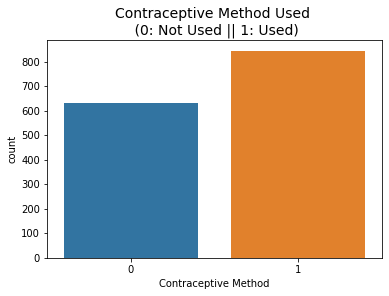

In [12]:
###Bar Graph for distribution
barchart('Contraceptive Method Used \n (0: Not Used || 1: Used)',"Contraceptive Method",df,None)

This shows the use of contraceptives is higher than no use.

###Pie Chart Representing Percentage of Imbalance


In [13]:
noused= len(df[df['Contraceptive Method']==0])
used=len(df[df['Contraceptive Method']==1])

percentofnoused= noused/(used+noused)
percentofused=used/(used+noused)

print("Percentage of No Use is", percentofnoused*100)
print("Percentage of used is", percentofused*100)

Percentage of No Use is 42.701968771215206
Percentage of used is 57.298031228784794


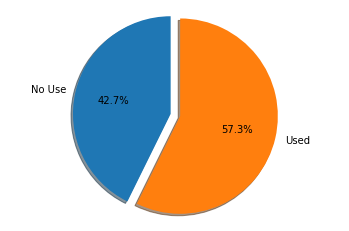

In [14]:
labels = 'No Use','Used'

sizes=[percentofnoused,percentofused]

explode=(0.1,0)

fig1, ax1 =plt.subplots()

ax1.pie(sizes,explode=explode,labels=labels,autopct='%1.1f%%', shadow= True, startangle=90)

ax1.axis('equal')

plt.show()

###Inspection of Dataset

In [0]:
#function to plot distribution

def hist(title,data ,bins,kde):
  
  plt.figure(figsize=(10,6))
  plt.title(title,fontsize=14)
  sns.distplot(data,bins=bins,kde=kde)
  

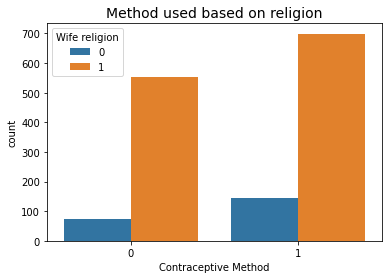

In [16]:
#Contraceptive used based on relgion 0 being non islam and 1 being islam
barchart('Method used based on religion',"Contraceptive Method",df,"Wife religion")

This shows that people with faith of islam have used contraceptive more than non islam people and not used as well.

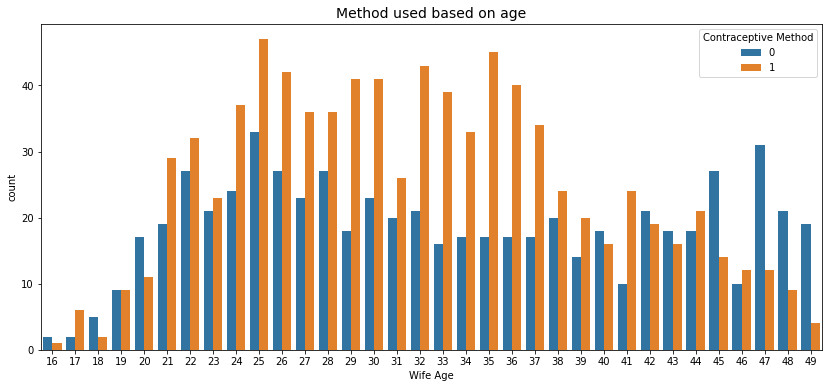

In [17]:
plt.figure(figsize=(14,6))
barchart('Method used based on age',"Wife Age",df,"Contraceptive Method")

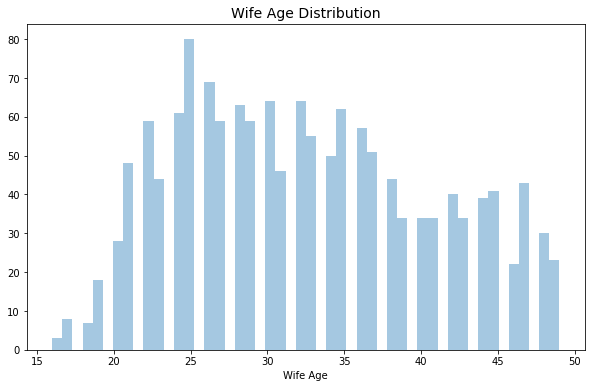

In [18]:
#distribution of the wifes ages
hist('Wife Age Distribution',df['Wife Age'],50,None)

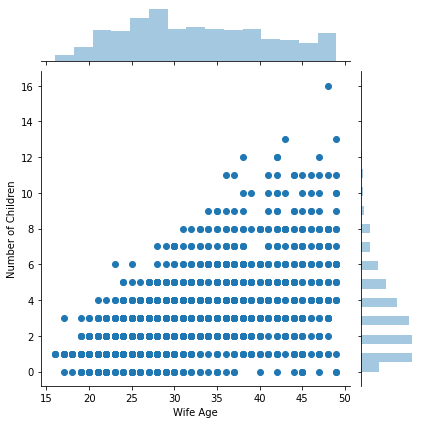

In [19]:
sns.jointplot(x='Wife Age',y='Number of Children',data=df)

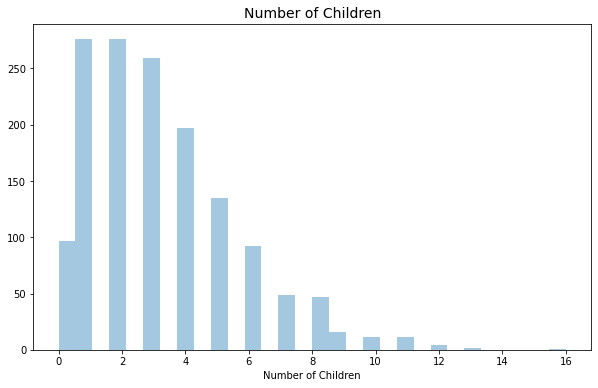

In [20]:
hist('Number of Children',df['Number of Children'],30,False)

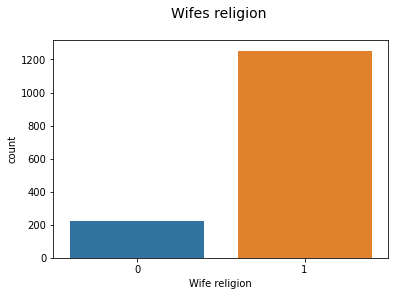

In [21]:
barchart('Wifes religion \n',"Wife religion",df,None)

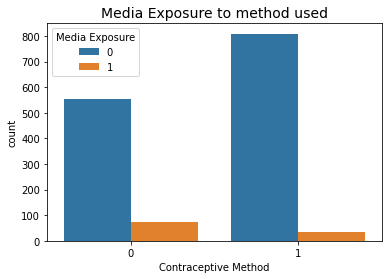

In [22]:
barchart('Media Exposure to method used','Contraceptive Method',df,"Media Exposure")

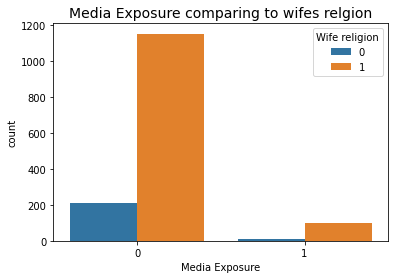

In [23]:
barchart('Media Exposure comparing to wifes relgion','Media Exposure',df,"Wife religion")

##2.To establish a baseline, perform cross-validation on your dataset using a decision tree and a random forest.

In [0]:
def boxplot(a,b,c,d):
  dfa=pd.DataFrame(a,columns=['Acc_scores'])
  dfa['Pre_scores']=b
  dfa['Rec_scores']=c
  dfa['F1_scores']=d
  plt.figure(6)
  boxplot = dfa.boxplot(column=['Acc_scores','Pre_scores','Rec_scores','F1_scores'])

In [0]:
#Function to establish a baseline and find average and accuracy 
def baseline(model,x,y):
  Acc_scores=cross_val_score(model,x,y,cv=10,scoring=make_scorer(accuracy_score)) #calculates accuracy 
  Pre_scores=cross_val_score(model,x,y,cv=10,scoring=make_scorer(precision_score)) #calculates precision
  Rec_scores=cross_val_score(model,x,y,cv=10,scoring=make_scorer(recall_score)) #calculates Recall
  F1_scores=cross_val_score(model,x,y,cv=10,scoring=make_scorer(f1_score)) #calculates F1
  print("Accuracy:", Acc_scores)
  print("Precision:", Pre_scores)
  print("Recall:", Rec_scores)
  print("F1 Score:", F1_scores)
  #Averages of the scores printed out
  print("Average Accuracy: %0.2f (+/- %0.2f)" % (Acc_scores.mean(), Acc_scores.std() * 2))
  print("Average Precision: %0.2f (+/- %0.2f)" % (Pre_scores.mean(), Pre_scores.std() * 2))
  print("Average Recall: %0.2f (+/- %0.2f)" % (Rec_scores.mean(), Rec_scores.std() * 2))
  print("Average F1 Score: %0.2f (+/- %0.2f)" % (F1_scores.mean(), F1_scores.std() * 2))
  boxplot(Acc_scores, Pre_scores,Rec_scores,F1_scores)

In [0]:
x=df.drop('Contraceptive Method', axis=1) ##Predictors
y=df['Contraceptive Method'] ## Target variable


Accuracy: [0.70945946 1.         1.         1.         1.         1.
 0.68027211 1.         1.         0.78911565]
Precision: [1.         1.         1.         1.         1.         1.
 0.75342466 1.         1.         0.73275862]
Recall: [0.49411765 1.         1.         1.         1.         1.
 0.6547619  1.         1.         1.        ]
F1 Score: [0.66141732 1.         1.         1.         1.         1.
 0.70063694 1.         1.         0.84577114]
Average Accuracy: 0.92 (+/- 0.26)
Average Precision: 0.95 (+/- 0.21)
Average Recall: 0.91 (+/- 0.35)
Average F1 Score: 0.92 (+/- 0.26)


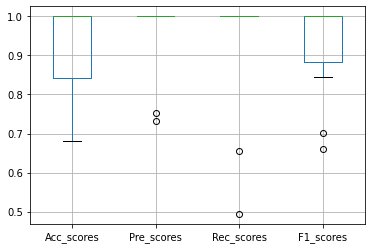

In [27]:
#Using the Decision Tree to perform cross validation
decclf = DecisionTreeClassifier(random_state=0)
baseline(decclf,x,y)

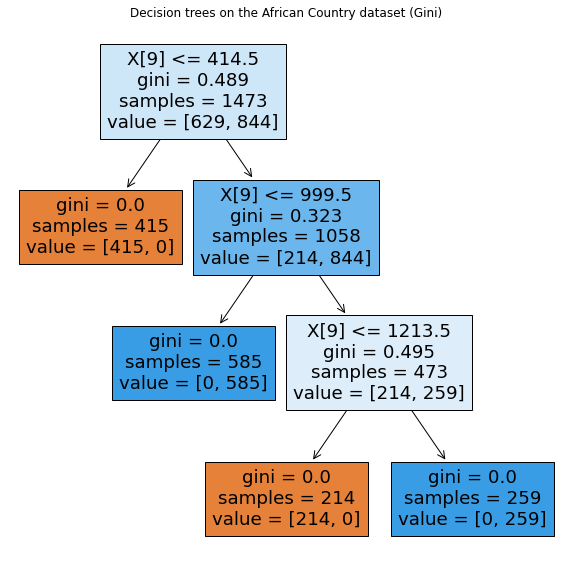

In [28]:
# Decision Tree graph
plt.figure(figsize=(10,10))
plottree=plot_tree(decclf.fit(x, y),filled=True)
plt.title("Decision trees on the African Country dataset (Gini)")
plt.show()


Accuracy: [0.71621622 1.         1.         1.         1.         1.
 0.72108844 0.95918367 1.         0.8707483 ]
Precision: [1.         1.         1.         1.         1.         1.
 0.8        1.         1.         0.81553398]
Recall: [0.50588235 1.         1.         1.         1.         1.
 0.6547619  0.91666667 1.         0.98823529]
F1 Score: [0.671875   1.         1.         1.         1.         1.
 0.7388535  0.94339623 1.         0.89361702]
Average Accuracy: 0.93 (+/- 0.22)
Average Precision: 0.96 (+/- 0.15)
Average Recall: 0.91 (+/- 0.34)
Average F1 Score: 0.92 (+/- 0.23)


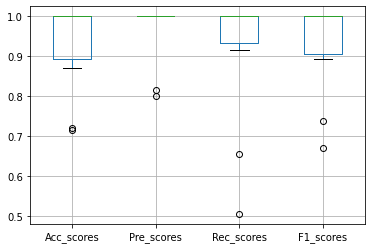

In [29]:
#Performing random forest classifier cross validation 
RFC=RandomForestClassifier()
baseline(RFC,x,y)

##3. Partition each of the datasets into 10 bins, keeping the imbalance ratio from the original dataset using stratified cross-validation 


###Performing Stratified CV to show the ratios and shape of each permutations array 

In [30]:
skf = StratifiedKFold(n_splits=10,shuffle=False,random_state=None)

#enumerate the splits and summerise the distributions
for train_index, test_index in skf.split(x, y):
  
  #selects rows
  xtrain, xtest = x.iloc[train_index], x.iloc[test_index]
  ytrain, ytest = y.iloc[train_index], y.iloc[test_index]
  
  #summarising the train and test composition
  train_0, train_1 = len(ytrain[ytrain==0]), len(ytrain[ytrain==1])
  test_0, test_1 = len(ytest[ytest==0]), len(ytest[ytest==1])
  print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))
  ##printing shape to see if the fold ratio is 9:1 which in this case it is roughly.
  print(xtrain.shape)
  print(xtest.shape)

>Train: 0=566, 1=759, Test: 0=63, 1=85
(1325, 10)
(148, 10)
>Train: 0=566, 1=759, Test: 0=63, 1=85
(1325, 10)
(148, 10)
>Train: 0=566, 1=759, Test: 0=63, 1=85
(1325, 10)
(148, 10)
>Train: 0=566, 1=760, Test: 0=63, 1=84
(1326, 10)
(147, 10)
>Train: 0=566, 1=760, Test: 0=63, 1=84
(1326, 10)
(147, 10)
>Train: 0=566, 1=760, Test: 0=63, 1=84
(1326, 10)
(147, 10)
>Train: 0=566, 1=760, Test: 0=63, 1=84
(1326, 10)
(147, 10)
>Train: 0=566, 1=760, Test: 0=63, 1=84
(1326, 10)
(147, 10)
>Train: 0=566, 1=760, Test: 0=63, 1=84
(1326, 10)
(147, 10)
>Train: 0=567, 1=759, Test: 0=62, 1=85
(1326, 10)
(147, 10)


###Checking Imbalance Ratio and Graph for one of the permutations 

####Training Data

Percentage of contraceptive is 57.23981900452488
Percentage of No contraceptive is 42.76018099547511


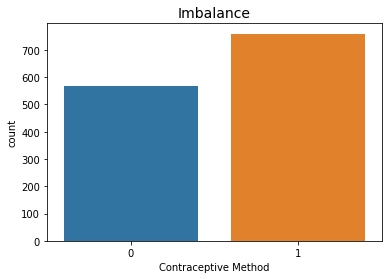

In [32]:
con= len(ytrain[ytrain==1])
no_con=len(ytrain[ytrain==0])

percentofcon= con/(con+no_con)
percentofnocon= no_con/(con+no_con)

print("Percentage of contraceptive is", percentofcon*100)
print("Percentage of No contraceptive is", percentofnocon*100)

plt.title('Imbalance', fontsize=14)
sns.countplot(ytrain,data=xtrain)

####Test Data

Percentage of contraceptive is 57.82312925170068
Percentage of No contraceptive is 42.17687074829932


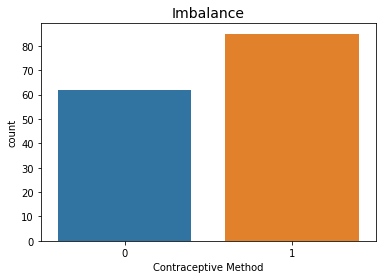

In [33]:
con= len(ytest[ytest==1])
no_con=len(ytest[ytest==0])

percentofcon= con/(con+no_con)
percentofnocon= no_con/(con+no_con)

print("Percentage of contraceptive is", percentofcon*100)
print("Percentage of No contraceptive is", percentofnocon*100)

plt.title('Imbalance', fontsize=14)
sns.countplot(ytest,data=xtest)

##Steps 4 - 8

In [0]:
#Elbow method function
def elbow():
  Sum_of_squared_distances = []
  K = range(1,10)
  for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(xtrain)
    Sum_of_squared_distances.append(km.inertia_)
  plt.figure(1)
  plt.plot(K, Sum_of_squared_distances, 'bx-')
  plt.xlabel('k')
  plt.ylabel('Sum_of_squared_distances')
  plt.title('Elbow Method For Optimal k')
  plt.show()

In [0]:
def silhoutte():
  sil=[]
  k_sil= range(2,10)

  for k_s in k_sil:
    print(k_sil,end=' ')
    kmeans= KMeans(n_clusters=k_s)
    kmeans=kmeans.fit(xtrain)
    labels=kmeans.labels_
    sil.append(silhouette_score(xtrain,labels,metric='euclidean')) 
  plt.figure(2)
  plt.plot(k_sil,sil, 'bx-')
  plt.xlabel('k')
  plt.ylabel('silhouette_score')
  plt.title('Silhoutte Method for Optimal k')
  plt.show

               Start                  




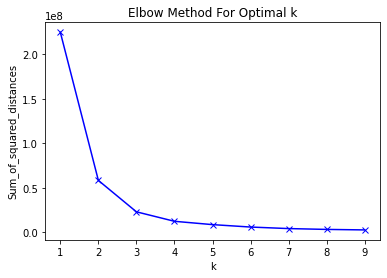

range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) 

            ytrain Data             


Closest Clusters Train Labels 
 [1 1 1 ... 2 2 2]
centroids 
 [[3.15564682e+01 3.15195072e+00 3.53388090e+00 3.45379877e+00
  8.33675565e-01 7.82340862e-01 2.11498973e+00 3.21971253e+00
  4.10677618e-02 7.43000000e+02]
 [3.29857955e+01 2.66193182e+00 3.29261364e+00 2.73011364e+00
  8.77840909e-01 7.27272727e-01 2.22727273e+00 2.94602273e+00
  1.16477273e-01 2.38500000e+02]
 [3.25555556e+01 2.94238683e+00 3.40329218e+00 3.37242798e+00
  8.41563786e-01 7.44855967e-01 2.15020576e+00 3.14197531e+00
  8.43621399e-02 1.22950000e+03]]


cluster center shape 
 (3, 10)




clusters 
 [1 0 2]


number of samples for each cluster 
 Counter({0: 487, 2: 486, 1: 352})


            ytest Data              


Closest Clusters Test Labels 
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

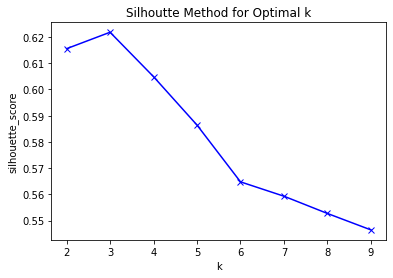

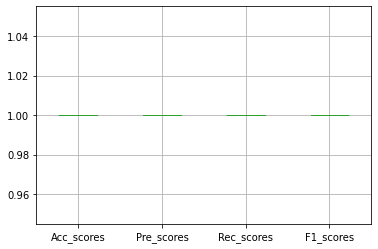

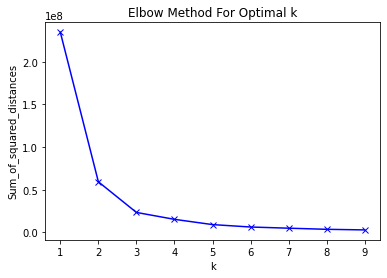

range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) 

            ytrain Data             


Closest Clusters Train Labels 
 [0 0 0 ... 2 2 2]
centroids 
 [[3.37551487e+01 2.79633867e+00 3.35697941e+00 3.02517162e+00
  8.71853547e-01 7.20823799e-01 2.16933638e+00 3.09382151e+00
  1.00686499e-01 2.71917620e+02]
 [3.10855856e+01 3.04279279e+00 3.48873874e+00 3.36936937e+00
  8.42342342e-01 7.97297297e-01 2.16441441e+00 3.19594595e+00
  5.63063063e-02 8.06500000e+02]
 [3.26554054e+01 2.97072072e+00 3.42342342e+00 3.36486486e+00
  8.35585586e-01 7.50000000e-01 2.14639640e+00 3.14639640e+00
  7.65765766e-02 1.25050000e+03]]


cluster center shape 
 (3, 10)




clusters 
 [0 1 2]


number of samples for each cluster 
 Counter({1: 444, 2: 444, 0: 437})


            ytest Data              


Closest Clusters Test Labels 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

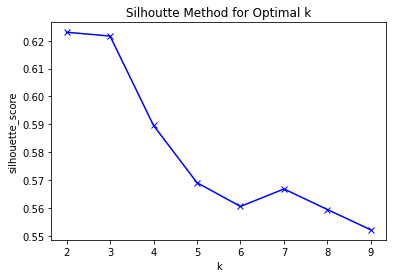

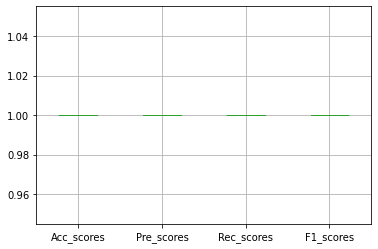

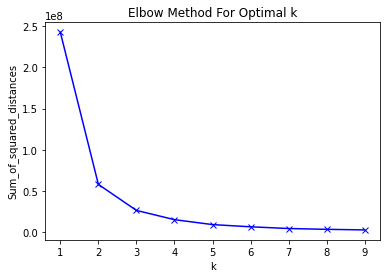

range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) 

            ytrain Data             


Closest Clusters Train Labels 
 [2 2 2 ... 1 1 1]
centroids 
 [[3.08778055e+01 2.92768080e+00 3.44887781e+00 3.27182045e+00
  8.67830424e-01 7.93017456e-01 2.20448878e+00 3.08728180e+00
  6.23441397e-02 8.70000000e+02]
 [3.23358209e+01 3.01990050e+00 3.43034826e+00 3.34825871e+00
  8.28358209e-01 7.48756219e-01 2.15671642e+00 3.16417910e+00
  7.21393035e-02 1.27150000e+03]
 [3.34923372e+01 2.88697318e+00 3.38122605e+00 3.16283525e+00
  8.62068966e-01 7.12643678e-01 2.11685824e+00 3.09195402e+00
  8.04597701e-02 3.08293103e+02]]


cluster center shape 
 (3, 10)




clusters 
 [2 0 1]


number of samples for each cluster 
 Counter({2: 522, 1: 402, 0: 401})


            ytest Data              


Closest Clusters Test Labels 
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 

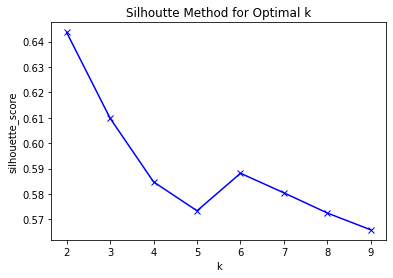

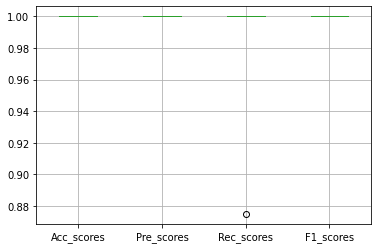

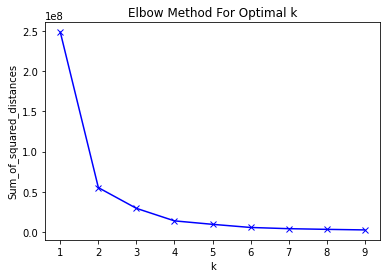

range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) 

            ytrain Data             


Closest Clusters Train Labels 
 [0 0 0 ... 1 1 1]
centroids 
 [[3.35882353e+01 2.85620915e+00 3.37908497e+00 3.01960784e+00
  8.67102397e-01 7.18954248e-01 2.10239651e+00 3.10239651e+00
  8.49673203e-02 2.66058824e+02]
 [3.25930736e+01 2.96103896e+00 3.41774892e+00 3.34415584e+00
  8.35497835e-01 7.51082251e-01 2.14069264e+00 3.13852814e+00
  7.79220779e-02 1.24150000e+03]
 [3.16839506e+01 3.11358025e+00 3.50864198e+00 3.45925926e+00
  8.27160494e-01 7.60493827e-01 2.16543210e+00 3.25925926e+00
  5.43209877e-02 7.77303704e+02]]


cluster center shape 
 (3, 10)




clusters 
 [0 2 1]


number of samples for each cluster 
 Counter({1: 463, 0: 459, 2: 404})


            ytest Data              


Closest Clusters Test Labels 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

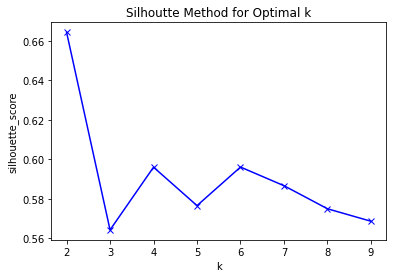

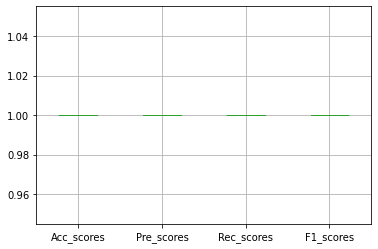

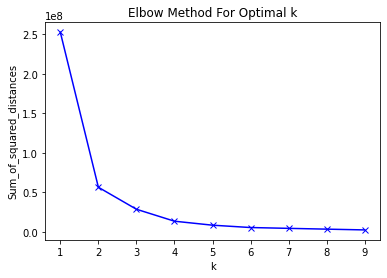

range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) 

            ytrain Data             


Closest Clusters Train Labels 
 [1 1 1 ... 0 0 0]
centroids 
 [[3.24474638e+01 2.94021739e+00 3.40217391e+00 3.36594203e+00
  8.24275362e-01 7.40942029e-01 2.17572464e+00 3.17028986e+00
  7.78985507e-02 1.19650000e+03]
 [3.32228412e+01 2.64066852e+00 3.27019499e+00 2.84401114e+00
  8.91364903e-01 7.27019499e-01 2.20055710e+00 2.90250696e+00
  1.16991643e-01 1.97777159e+02]
 [3.23325301e+01 3.26506024e+00 3.59277108e+00 3.53493976e+00
  8.26506024e-01 7.66265060e-01 2.02168675e+00 3.30843373e+00
  3.85542169e-02 6.45800000e+02]]


cluster center shape 
 (3, 10)




clusters 
 [1 2 0]


number of samples for each cluster 
 Counter({0: 551, 2: 416, 1: 359})


            ytest Data              


Closest Clusters Test Labels 
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

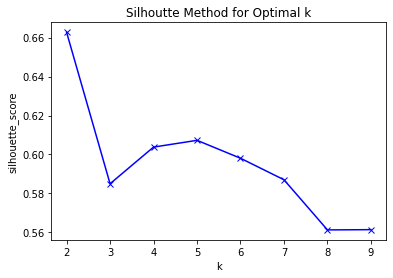

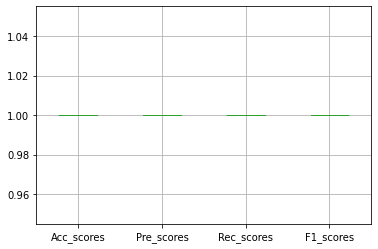

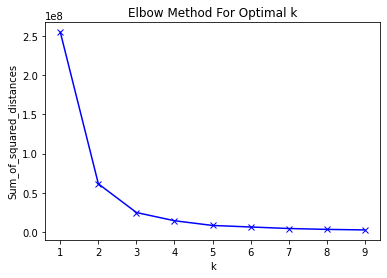

range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) 

            ytrain Data             


Closest Clusters Train Labels 
 [2 2 2 ... 1 1 1]
centroids 
 [[3.26837416e+01 3.22048998e+00 3.55679287e+00 3.56570156e+00
  8.55233853e-01 7.70601336e-01 1.97104677e+00 3.28507795e+00
  4.23162584e-02 6.13000000e+02]
 [3.24246824e+01 2.94010889e+00 3.40108893e+00 3.36842105e+00
  8.25771325e-01 7.40471869e-01 2.17422868e+00 3.17059891e+00
  7.80399274e-02 1.19700000e+03]
 [3.35981595e+01 2.69018405e+00 3.32822086e+00 2.89877301e+00
  9.07975460e-01 7.20858896e-01 2.16564417e+00 2.88036810e+00
  1.01226994e-01 1.64625767e+02]]


cluster center shape 
 (3, 10)




clusters 
 [2 0 1]


number of samples for each cluster 
 Counter({1: 551, 0: 449, 2: 326})


            ytest Data              


Closest Clusters Test Labels 
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 

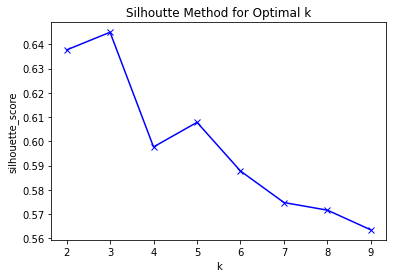

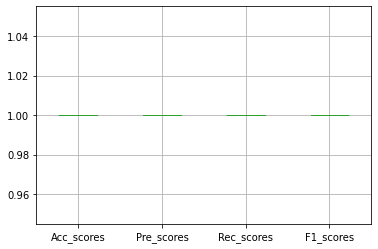

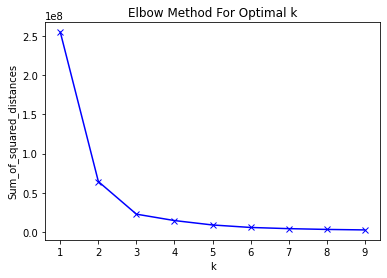

range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) 

            ytrain Data             


Closest Clusters Train Labels 
 [0 0 0 ... 1 1 1]
centroids 
 [[3.33080685e+01 2.71393643e+00 3.31784841e+00 2.88753056e+00
  8.87530562e-01 7.23716381e-01 2.19315403e+00 2.96332518e+00
  9.77995110e-02 2.06804401e+02]
 [3.26507937e+01 2.95238095e+00 3.40589569e+00 3.37868481e+00
  8.32199546e-01 7.46031746e-01 2.14739229e+00 3.13605442e+00
  7.93650794e-02 1.24944218e+03]
 [3.18844538e+01 3.23529412e+00 3.58823529e+00 3.48739496e+00
  8.44537815e-01 7.85714286e-01 2.03781513e+00 3.23529412e+00
  4.20168067e-02 6.83500000e+02]]


cluster center shape 
 (3, 10)




clusters 
 [0 2 1]


number of samples for each cluster 
 Counter({2: 476, 1: 441, 0: 409})


            ytest Data              


Closest Clusters Test Labels 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 

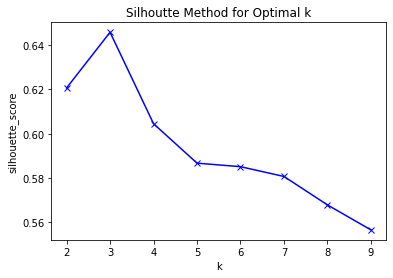

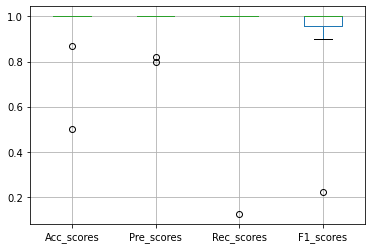

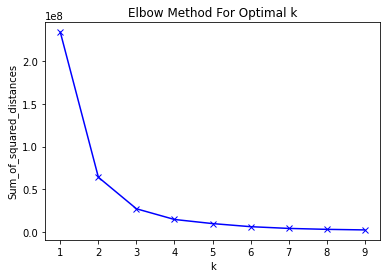

range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) 

            ytrain Data             


Closest Clusters Train Labels 
 [0 0 0 ... 2 2 2]
centroids 
 [[3.34416342e+01 2.80155642e+00 3.35797665e+00 2.98443580e+00
  8.77431907e-01 7.17898833e-01 2.13229572e+00 3.04280156e+00
  9.53307393e-02 2.56500000e+02]
 [3.14863281e+01 3.11132812e+00 3.51562500e+00 3.43359375e+00
  8.37890625e-01 7.81250000e-01 2.13671875e+00 3.21875000e+00
  4.88281250e-02 7.69500000e+02]
 [3.19500000e+01 2.93666667e+00 3.38666667e+00 3.30000000e+00
  8.26666667e-01 7.43333333e-01 2.24666667e+00 3.13333333e+00
  8.00000000e-02 1.28582000e+03]]


cluster center shape 
 (3, 10)




clusters 
 [0 1 2]


number of samples for each cluster 
 Counter({0: 514, 1: 512, 2: 300})


            ytest Data              


Closest Clusters Test Labels 
 [1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 

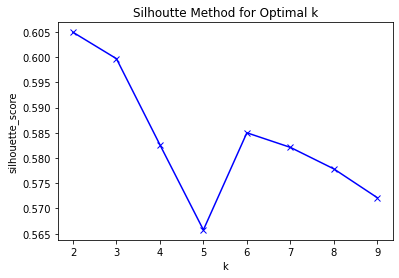

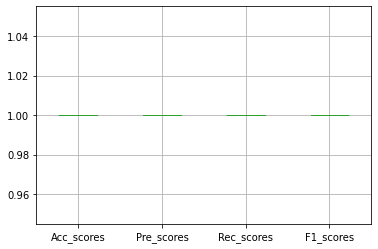

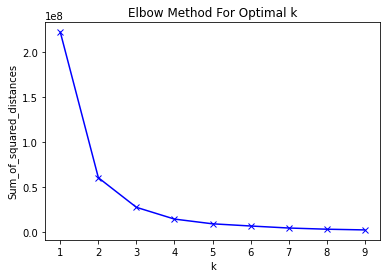

range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) 

            ytrain Data             


Closest Clusters Train Labels 
 [1 1 1 ... 2 2 2]
centroids 
 [[3.16694215e+01 3.15495868e+00 3.53099174e+00 3.50206612e+00
  8.34710744e-01 7.76859504e-01 2.11570248e+00 3.21074380e+00
  3.92561983e-02 7.25500000e+02]
 [3.34297521e+01 2.75413223e+00 3.33884298e+00 2.93388430e+00
  8.78099174e-01 7.25206612e-01 2.15495868e+00 3.02479339e+00
  9.91735537e-02 2.41500000e+02]
 [3.28016760e+01 2.96648045e+00 3.39944134e+00 3.36871508e+00
  8.26815642e-01 7.59776536e-01 2.11173184e+00 3.22067039e+00
  8.93854749e-02 1.20815084e+03]]


cluster center shape 
 (3, 10)




clusters 
 [1 0 2]


number of samples for each cluster 
 Counter({1: 484, 0: 483, 2: 359})


            ytest Data              


Closest Clusters Test Labels 
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 

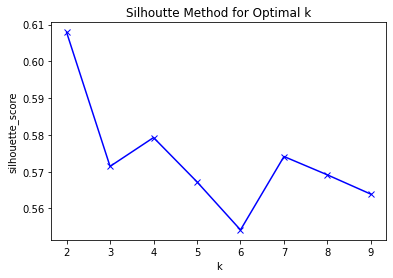

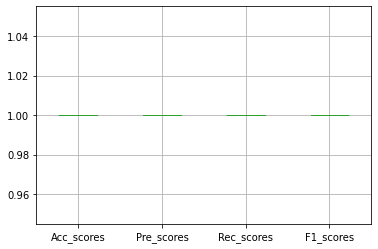

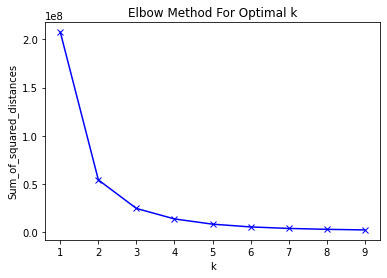

range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) range(2, 10) 

            ytrain Data             


Closest Clusters Train Labels 
 [1 1 1 ... 2 2 2]
centroids 
 [[3.18760870e+01 3.22173913e+00 3.57826087e+00 3.52826087e+00
  8.45652174e-01 7.82608696e-01 2.04130435e+00 3.22826087e+00
  4.34782609e-02 6.87500000e+02]
 [3.33296943e+01 2.70960699e+00 3.31004367e+00 2.87117904e+00
  8.86462882e-01 7.24890830e-01 2.18558952e+00 2.99563319e+00
  1.00436681e-01 2.28500000e+02]
 [3.26323529e+01 2.97303922e+00 3.45098039e+00 3.38480392e+00
  8.43137255e-01 7.35294118e-01 2.13970588e+00 3.14950980e+00
  7.10784314e-02 1.14794118e+03]]


cluster center shape 
 (3, 10)




clusters 
 [1 0 2]


number of samples for each cluster 
 Counter({1: 459, 0: 459, 2: 408})


            ytest Data              


Closest Clusters Test Labels 
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 

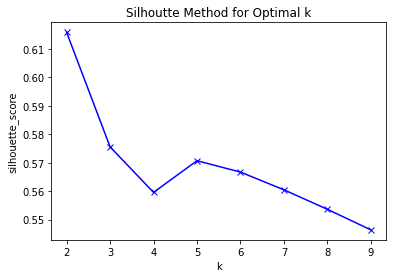

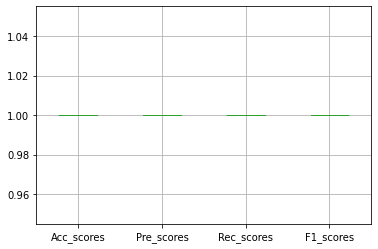

In [42]:
#enumerate the splits and summerise the distributions
for train_index, test_index in skf.split(x, y):
  
  #selects rows
  xtrain, xtest = x.iloc[train_index], x.iloc[test_index]
  ytrain, ytest = y.iloc[train_index], y.iloc[test_index]
    
  #std_scaled=StandardScaler().fit(xtrain)
  #xtrain=std_scaled.transform(xtrain)
  #xtest=std_scaled.transform(xtest)

  print('               Start                  ')
  print('\n')
  #calling elbow and silhoutte method
  elbow()
  silhoutte()

  #after using elbow and silhouette number of clusters that have been decided is 3-6 but 3 will be used for the train set.
  #run kmeans
  numk=3
  #model created using kmeans object and fitting kmeans object to dataset
  kmeans=KMeans(n_clusters=numk)
  kmeans = kmeans.fit(xtrain)

  y_train_clusters = kmeans.predict(xtrain)
  print('\n')
  print('            ytrain Data             ')
  print('\n')
  #Predict the closest cluster each sample in X belongs to.
  print('Closest Clusters Train Labels \n', y_train_clusters)
  

  #gets each clusters centroid points
  centroids=kmeans.cluster_centers_
  print('centroids \n', centroids)
  print('\n')
  #3 clusters
  print('cluster center shape \n',kmeans.cluster_centers_.shape)
  print('\n')
  
  #append the cluster labels into dataframe to visualise better
  df0=pd.DataFrame(data=xtrain)
  df0['clusters']=y_train_clusters
  
  #prints the clusters labels in lowest to highest order for each iteration
  print('\n')
  print('clusters \n',df0.clusters.unique())
  #prints out the number of samples of the minority class in that cluster
  print('\n')
  print('number of samples for each cluster \n', Counter(y_train_clusters))

  #Assigning xtest samples to its closest cluster
  y_test_clusters =  kmeans.predict(xtest)

  df1=pd.DataFrame(data=xtest)
  df1['clusters']=y_test_clusters

  print('\n')
  print('            ytest Data              ')
  print('\n')
  #Predict the closest cluster each sample in X belongs to.
  print('Closest Clusters Test Labels \n', y_test_clusters)
  RFC=RandomForestClassifier()
  print('\n')
  baseline(RFC,df1,ytest)
  print('\n')